In [79]:
import pandas as pd

In [80]:
df = pd.read_csv('./../dist/aduan-siswa.csv')
df.head()

,Aduan,Label
0,sulit temu materi ajar yang perlu di kelas pus...,Prasarana
1,sulit minta bantu kepada siapa buat rasa tidak...,Kesiswaan
2,sulit paham instruksi tugas dan tidak tahu yan...,Kurikulum
3,sistem nilai tidak adil dan tidak konsisten gu...,Kesiswaan
4,harap guru beri lebih banyak umpan balik dan k...,Kurikulum


In [81]:
df['Label'].unique()

array(['Prasarana', 'Kesiswaan', 'Kurikulum'], dtype=object)

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Aduan   104 non-null    object
 1   Label   104 non-null    object
dtypes: object(2)
memory usage: 1.8+ KB


In [83]:
X_text = df['Aduan']
y = df['Label']

In [84]:
X_text.head()

0    sulit temu materi ajar yang perlu di kelas pus...
1    sulit minta bantu kepada siapa buat rasa tidak...
2    sulit paham instruksi tugas dan tidak tahu yan...
3    sistem nilai tidak adil dan tidak konsisten gu...
4    harap guru beri lebih banyak umpan balik dan k...
Name: Aduan, dtype: object

In [85]:
y.head()

0    Prasarana
1    Kesiswaan
2    Kurikulum
3    Kesiswaan
4    Kurikulum
Name: Label, dtype: object

In [86]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X_text)

In [87]:
print(X.shape)
print(y.shape)

(104, 371)
(104,)


In [88]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(X_train.shape)
print(X_test.shape)

(83, 371)
(21, 371)


In [89]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [90]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[9, 0, 1],
       [4, 3, 0],
       [2, 0, 2]])

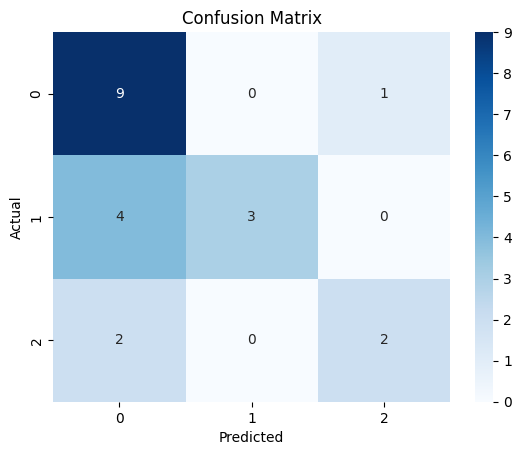

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualisasi confusion matrix
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


In [92]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')

Accuracy: 0.6666666666666666
Precision: 0.746031746031746
Recall: 0.6666666666666666


In [98]:
input_saran = vectorizer.transform([
  'kipas angin rusak',
  'wc kotor', 
  'cara mengajar guru membosankan',
  'susah memahami belajar matematika'
])
predict = model.predict(input_saran)

print(predict)

['Prasarana' 'Prasarana' 'Kesiswaan' 'Kurikulum']
